# Portfolio Pal - Stock Market Analysis 

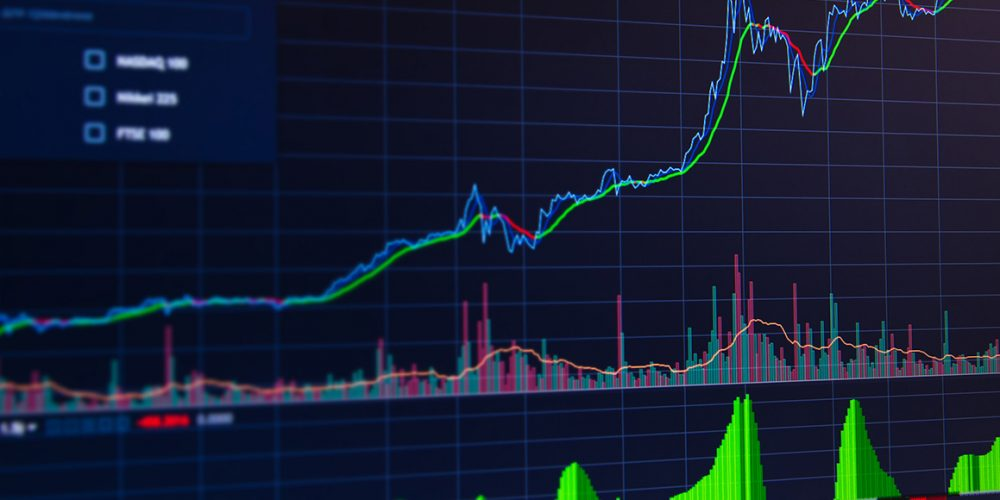

In this project we will be looking at data collected from the Dow Jones Industrial Average to make predictions using Machine Learning algorithms. The Pandas DataReader is utilized to get stock information from Yahoo Financial and I have provided methods to help visualize different aspects of this data. The goal of this project is not to automatically trade stocks for an investor, but instead to help investors analyze and interpret the risks associated with investing in a particular stock. Through the process of data visualization and exploratory analysis this project aims to equip investors with as much information as possible to help them determine what position they should take on a particular stock that is listed in the Dow 30 index. To help aid investors, we will attempt to utilize the fields of Reinforcement Learning to train a Deep Q Network (DQN) to help determine the best times to buy, sell or hold up to 3 stocks.

We will begin by analyzing the following aspects of the data:

    1.) Visualize different periods of selected stocks price change over time
    2.) Calculate daily return of the stock on average
    3.) Visualize the moving average of the various stocks
    4.) Determine the correlation between different stocks by performing exploratory analysis
    5.) Visualize the risk vs expected return for investing in a particular stock
    6.) Attempt to predict stock prices using Deep Reinforcement Learning
   

# 1. Determine the change of a stock's price over time

In this section we'll begin by loading in our data and go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock. If there is no stock data in the current repository begin by running the generate_stock_data.py file.

In [3]:
# Here we have all of our basic imports for our exploratory analysis
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fast")

# inline sets matplotlib to output graphs in Jupyter Notebook
%matplotlib inline 

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime, timedelta

In [63]:
# The current DowJones 30 index
# Note: this index can be edited to include or exclude any stocks dynamically
stock_index = ['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS',  'DOW', 
          'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 
          'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT']

# Our Dictionary for storing all stock data
stock_data = {}

# Get last week of data
end = datetime.now() - timedelta(days=7)

for i in range(len(stock_index)):
    dataframe = pd.read_csv(f'./stock data/{stock_index[i]}.csv')
    date = end.strftime('%Y-%m-%d')
    
    #If the new data is not in our dataset the .csv files are updated
    if date not in dataframe['Date'].values:
        #This row gets appended to our generated data for easy access when plotting our data
        company_name = ["APPLE", "AMGEN", "AMERICAN EXPRESS", "BOEING", "CATERPILLAR", 
                "SALESFORCE", "CISCO", "CHEVRON", "DISNEY", "DOW",
               "GOLDMAN SACHS", "HOME DEPOT", "HONEYWELL", "IBM", "INTEL",
                "JOHNSON & JOHNSON", "CHASE", "COKE", "MCDONALDS", "3M",
               "MERCK", "MICROSOFT", "NIKE", "PROCTER & GAMBLE", "THE TRAVELERS COMPANY",
                "UNITEDHEALTH", "VISA", "VERIZON", "WALGREENS", "WALMART"]
        
        print(f"Updating {stock_index[i]}...")
        last_date = dataframe['Date'].iloc[-1]
        start = datetime.strptime(last_date, '%Y-%m-%d') + timedelta(days=1)
        try:
            new_data = DataReader(stock_index[i], 'yahoo', start, end)
        except:
            print(f"Unable to update {stock_index[i]} dataframe for date range {start} to {end}.")
        new_data['company_name'] = company_name[i]
        new_data['Date'] = ''
        for index in new_data.index:
            new_data.loc[index, 'Date'] = index.strftime('%Y-%m-%d')
        dataframe = dataframe.append(new_data, ignore_index=True)
        dataframe.to_csv(f'./stock data/{stock_index[i]}.csv', index=False)
        
    index = []
    for date in dataframe['Date']:
        index.append(datetime.strptime(date, '%Y-%m-%d'))
    
    #The updated dataframe is loaded into the dictionary
    dataframe = dataframe.drop(columns='Date')
    stock_data[stock_index[i]] = dataframe.set_index(pd.Index(index))

Now that we have loaded in all the data up to yesterdays closing numbers, we can begin visualizing some of the data we've collected. For example we can show what the dataframe looks like for a particular stock.

In [5]:
example = ''

while example not in stock_index:
    example = input("Enter a stock ticker:") 

Enter a stock ticker:AAPL


In [6]:
stock_data[example]

High         Low        Open       Close       Volume  \
2006-04-28    2.546429    2.471429    2.477857    2.513929  760037600.0   
2006-05-01    2.555000    2.470000    2.527500    2.485714  750380400.0   
2006-05-02    2.570714    2.503929    2.505357    2.557857  771663200.0   
2006-05-03    2.569643    2.506429    2.565357    2.540714  686991200.0   
2006-05-04    2.603214    2.516429    2.543571    2.540357  860420400.0   
...                ...         ...         ...         ...          ...   
2021-04-22  134.149994  131.410004  133.039993  131.940002   84566500.0   
2021-04-23  135.119995  132.160004  132.160004  134.320007   78657500.0   
2021-04-26  135.059998  133.559998  134.830002  134.720001   66905100.0   
2021-04-27  135.410004  134.110001  135.009995  134.389999   66015800.0   
2021-04-28  135.020004  133.080002  134.309998  133.580002  106589600.0   

             Adj Close company_name  
2006-04-28    2.165406        APPLE  
2006-05-01    2.141103        APPLE  
2006-05-02    2.203244        APPLE  
2006-05-03    2.188478        APPLE  
2006-05-04    2.188171        APPLE  
...                ...          ...  
2021-04-22  131.940002        APPLE  
2021-04-23  134.320007        APPLE  
2021-04-26  134.720001        APPLE  
2021-04-27  134.389999        APPLE  
2021-04-28  133.580002        APPLE  

[3776 rows x 7 columns]

In [7]:
stock_data[example].describe()

High          Low         Open        Close        Volume  \
count  3776.000000  3776.000000  3776.000000  3776.000000  3.776000e+03   
mean     28.912438    28.296077    28.609423    28.615870  4.265703e+08   
std      28.990431    28.268601    28.643587    28.644461  3.846243e+08   
min       1.888929     1.791429     1.847500     1.809643  4.544800e+07   
25%       7.447590     7.261428     7.353571     7.355535  1.366062e+08   
50%      21.011071    20.517858    20.759642    20.817678  3.012530e+08   
75%      38.542500    37.938751    38.365000    38.321250  5.994583e+08   
max     145.089996   141.369995   143.600006   143.160004  3.372970e+09   

         Adj Close  
count  3776.000000  
mean     27.210151  
std      28.824185  
min       1.558760  
25%       6.335790  
50%      18.019726  
75%      36.673621  
max     142.946396

In [8]:
for ticker in stock_index:
    print(f"\n{ticker}")
    stock_data[ticker].info()


AAPL
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3776 entries, 2006-04-28 to 2021-04-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          3776 non-null   float64
 1   Low           3776 non-null   float64
 2   Open          3776 non-null   float64
 3   Close         3776 non-null   float64
 4   Volume        3776 non-null   float64
 5   Adj Close     3776 non-null   float64
 6   company_name  3776 non-null   object 
dtypes: float64(6), object(1)
memory usage: 236.0+ KB

AMGN
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3776 entries, 2006-04-28 to 2021-04-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          3776 non-null   float64
 1   Low           3776 non-null   float64
 2   Open          3776 non-null   float64
 3   Close         3776 non-null   float64
 4   Volume        3776 non-null   float6

Now we can get a historical view of the adjusted closing price for a list of stocks for a given date range in the last 10 years. You an also type STOCK_INDEX to get the entire index!

Enter a list of tickers separated by whitespace:AAPL AMGN HON
Date Range: 2006-04-28 00:00:00 - 2021-04-28 00:00:00
Note: Some dates may be unavailable
Enter a valid start date (YYYY-MM-DD):2005-06-01
Enter a valid start date (YYYY-MM-DD):2005-06-02
Enter a valid start date (YYYY-MM-DD):2006-06-03
Enter a valid start date (YYYY-MM-DD):2006-06-04
Enter a valid start date (YYYY-MM-DD):2006-04-28
Enter a valid end date (YYYY-MM-DD):2021-04-28


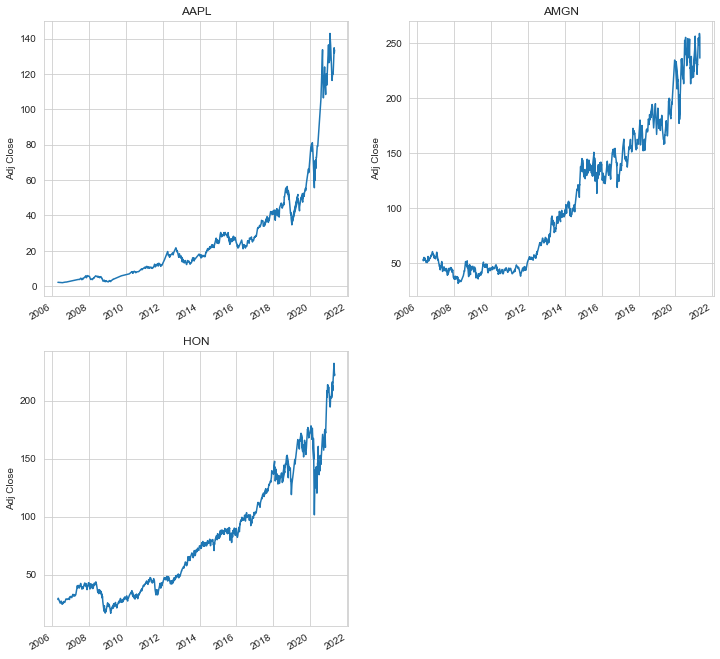

In [54]:
tickers = ['']
valid_input = False

while not valid_input:
    valid_input = True
    for ticker in tickers:
        if ticker not in stock_index:
            user_input = input("Enter a list of tickers separated by whitespace:")
            if user_input == "STOCK_INDEX":
                tickers = stock_index
            else:
                valid_input = False
                tickers = user_input.split(' ')
            break

max_index = stock_data[tickers[0]].index.max()
min_index = stock_data[tickers[0]].index.min()
for ticker in tickers:
    index = stock_data[ticker].index.max()
    if max_index < index:
        max_index = index
    index = stock_data[ticker].index.min()
    if min_index > index:
        min_index = index
    
print(f"Date Range: {min_index} - {max_index}")
print("Note: Some dates may be unavailable")

valid_input = False
while not valid_input:
    valid_input = True
    start = input(f"Enter a valid start date (YYYY-MM-DD):")
    if start not in stock_data[tickers[0]].index:
        valid_input = False

valid_input = False

while not valid_input:
    valid_input = True
    end = input(f"Enter a valid end date (YYYY-MM-DD):")
    if end not in stock_data[tickers[0]].index or end < start:
        valid_input = False

nrows = math.ceil(len(tickers)/2)        
plt.figure(figsize=(12, 4 * nrows))
plt.subplots_adjust(top=1.25, bottom=1.2)

target_data = {}

for i, ticker in enumerate(tickers, 1):
    plt.subplot(nrows, 2, i)
    target_data[ticker] = stock_data[ticker][start:end]
    target_data[ticker]['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{ticker}")

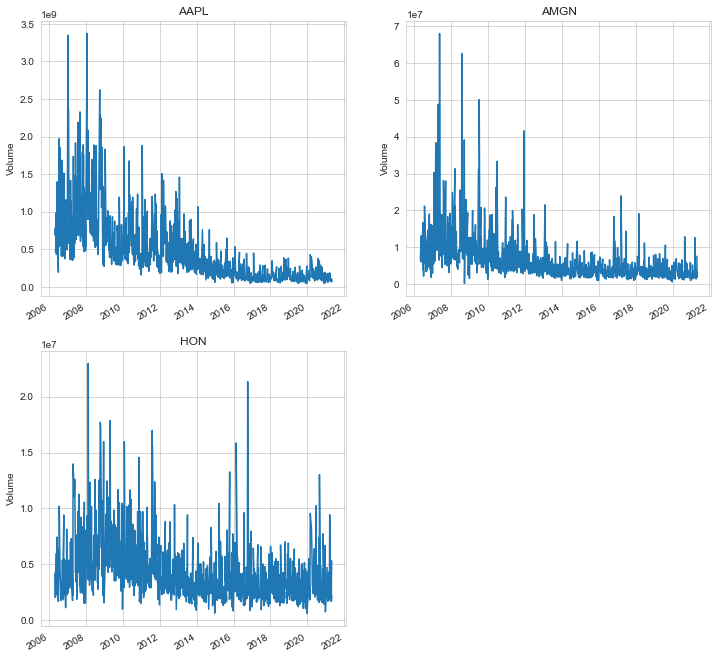

In [55]:
# Plotting the total volume of stock being traded each day for the inputed stocks and date range
plt.figure(figsize=(12, 4 * nrows))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, ticker in enumerate(tickers, 1):
    plt.subplot(nrows, 2, i)
    target_data[ticker]['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{ticker}")

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. Calculate and append the moving average for the dataset

In [56]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for ticker in stock_index:
        column_name = f"MA for {ma} days"
        stock_data[ticker][column_name] = stock_data[ticker]['Adj Close'].rolling(ma).mean()
        
target_data = {}

for ticker in tickers:
    target_data[ticker] = stock_data[ticker].loc[start:end]

In [57]:
target_data[tickers[0]]

High         Low        Open       Close       Volume  \
2006-04-28    2.546429    2.471429    2.477857    2.513929  760037600.0   
2006-05-01    2.555000    2.470000    2.527500    2.485714  750380400.0   
2006-05-02    2.570714    2.503929    2.505357    2.557857  771663200.0   
2006-05-03    2.569643    2.506429    2.565357    2.540714  686991200.0   
2006-05-04    2.603214    2.516429    2.543571    2.540357  860420400.0   
...                ...         ...         ...         ...          ...   
2021-04-22  134.149994  131.410004  133.039993  131.940002   84566500.0   
2021-04-23  135.119995  132.160004  132.160004  134.320007   78657500.0   
2021-04-26  135.059998  133.559998  134.830002  134.720001   66905100.0   
2021-04-27  135.410004  134.110001  135.009995  134.389999   66015800.0   
2021-04-28  135.020004  133.080002  134.309998  133.580002  106589600.0   

             Adj Close company_name  MA for 10 days  MA for 20 days  \
2006-04-28    2.165406        APPLE             NaN             NaN   
2006-05-01    2.141103        APPLE             NaN             NaN   
2006-05-02    2.203244        APPLE             NaN             NaN   
2006-05-03    2.188478        APPLE             NaN             NaN   
2006-05-04    2.188171        APPLE             NaN             NaN   
...                ...          ...             ...             ...   
2021-04-22  131.940002        APPLE      133.275000      128.568000   
2021-04-23  134.320007        APPLE      133.407001      129.254501   
2021-04-26  134.720001        APPLE      133.755000      129.930001   
2021-04-27  134.389999        APPLE      133.751001      130.580001   
2021-04-28  133.580002        APPLE      133.906001      131.264001   

            MA for 50 days  Daily Return  
2006-04-28             NaN           NaN  
2006-05-01             NaN     -0.011224  
2006-05-02             NaN      0.029023  
2006-05-03             NaN     -0.006702  
2006-05-04             NaN     -0.000141  
...                    ...           ...  
2021-04-22        126.3624     -0.011685  
2021-04-23        126.3410      0.018039  
2021-04-26        126.3328      0.002978  
2021-04-27        126.3132     -0.002450  
2021-04-28        126.3210     -0.006027  

[3776 rows x 11 columns]

Now we can view the histograms of various tickers from our target dataset.

Choose from ['AAPL', 'AMGN'] to view Histogram:AAPL


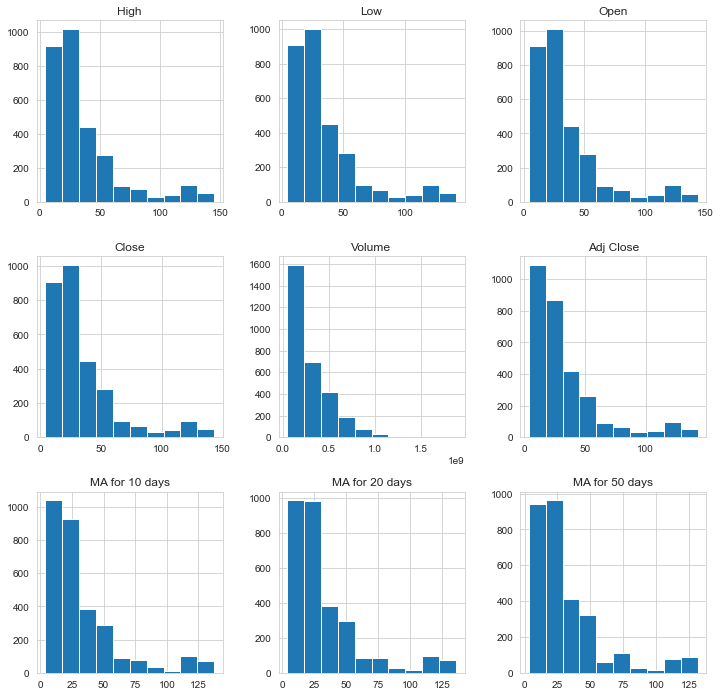

In [15]:
target = ''
keys = list(target_data.keys())

while target not in keys:
    target = input(f"Choose from {keys} to view Histogram:")

target_data[target].hist(figsize=(12, 12));

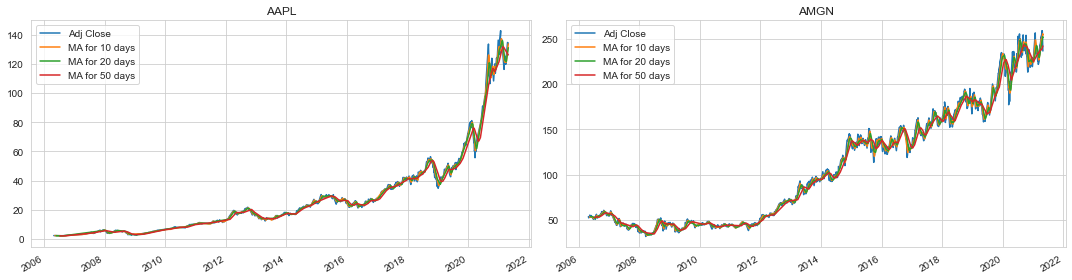

In [52]:
fig, axes = plt.subplots(nrows=nrows, ncols=2)
fig.set_figheight(4 * nrows)
fig.set_figwidth(15)

if len(tickers)>2:
    for i, ticker in enumerate(tickers):
        target_data[ticker][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[math.floor(i/2),i%2])
        axes[math.floor(i/2),i%2].set_title(ticker)
else:
    for i, ticker in enumerate(tickers):
        target_data[ticker][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[i])
        axes[i].set_title(ticker)

fig.tight_layout()

# 3. Calculate the daily return for each stock in the data set

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

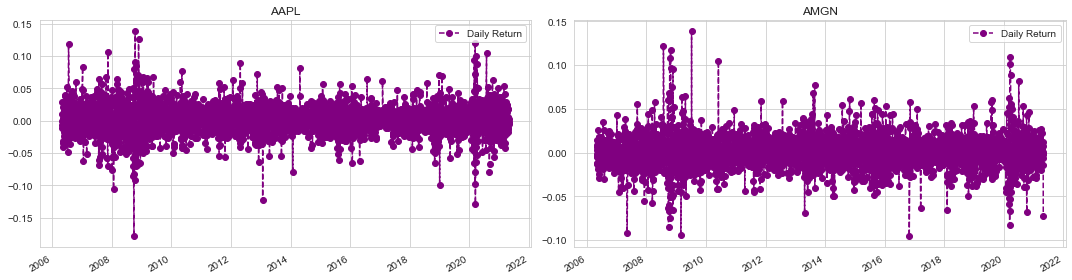

In [53]:
# We'll use pct_change to find the percent change for each day
for ticker in stock_index:
    stock_data[ticker]['Daily Return'] = stock_data[ticker]['Adj Close'].pct_change()

target_data = {}

for ticker in tickers:
    target_data[ticker] = stock_data[ticker].loc[start:end]       

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=nrows, ncols=2)
fig.set_figheight(4 * nrows)
fig.set_figwidth(15)

if len(tickers)>2:
    for i, ticker in enumerate(target_data):
        target_data[ticker]['Daily Return'].plot(ax=axes[math.floor(i/2),i%2], legend=True,color='purple', linestyle='--', marker='o')
        axes[math.floor(i/2),i%2].set_title(ticker)
else:
    for i, ticker in enumerate(target_data):
        target_data[ticker]['Daily Return'].plot(ax=axes[i], legend=True,color='purple', linestyle='--', marker='o')
        axes[i].set_title(ticker)

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

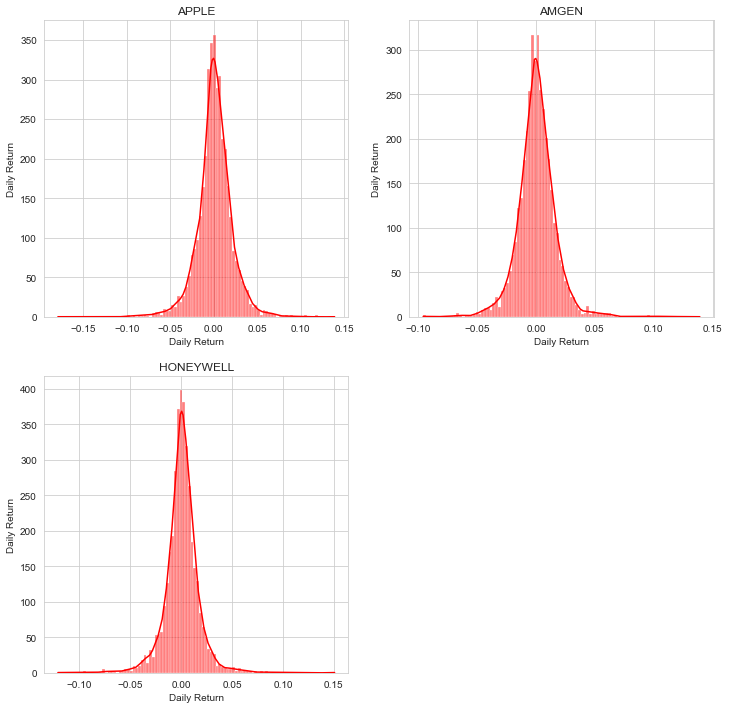

In [58]:
# dropna() is used here since NaN values can't be read by Seaborn
plt.figure(figsize=(12, 6*nrows))

for i, ticker in enumerate(target_data, 1):
    plt.subplot(nrows, 2, i)
    sns.histplot(data=target_data[ticker]['Daily Return'].dropna(),bins=100, kde=True,color='red')
    plt.ylabel('Daily Return')
    name = target_data[ticker].iloc[0]['company_name']
    plt.title(f'{name}')

# 4. Determine correlations between different stock closing prices

In order to analyze the returns of our target data we will build a DataFrame with only the Adjusted Closing columns from each of the stock dataframes.

In [64]:
closing_df = DataReader(tickers, 'yahoo', start, end)['Adj Close']

closing_df

Symbols           AAPL        AMGN         HON
Date                                          
2006-04-28    2.165406   53.572384   28.633858
2006-05-01    2.141103   52.907669   29.024626
2006-05-02    2.203244   52.219219   29.482773
2006-05-03    2.188478   52.535759   29.449106
2006-05-04    2.188171   52.978889   29.725313
...                ...         ...         ...
2021-04-16  134.160004  255.710007  232.110001
2021-04-19  134.839996  255.970001  230.970001
2021-04-20  133.110001  259.140015  227.330002
2021-04-21  133.500000  258.779999  230.500000
2021-04-22  131.940002  255.050003  229.259995

[3772 rows x 3 columns]

Now that we have all the closing prices in one dataframe, we can calculate the daily return for all the stocks.

In [60]:
target_returns = closing_df.pct_change()

target_returns

Symbols         AAPL      AMGN       HON
Date                                    
2006-04-28       NaN       NaN       NaN
2006-05-01 -0.011224 -0.012408  0.013647
2006-05-02  0.029023 -0.013012  0.015785
2006-05-03 -0.006702  0.006062 -0.001142
2006-05-04 -0.000141  0.008435  0.009379
...              ...       ...       ...
2021-04-22 -0.011685 -0.014414 -0.005380
2021-04-23  0.018039  0.007763 -0.020762
2021-04-26  0.002978 -0.005875 -0.013274
2021-04-27 -0.002450 -0.001526  0.006365
2021-04-28 -0.006027 -0.072198 -0.000269

[3776 rows x 3 columns]

Now we can compare the daily percentage return of two stocks to check how correlated they are. As you can see comparing a stock to itself should give you a perfectly linear relationship.

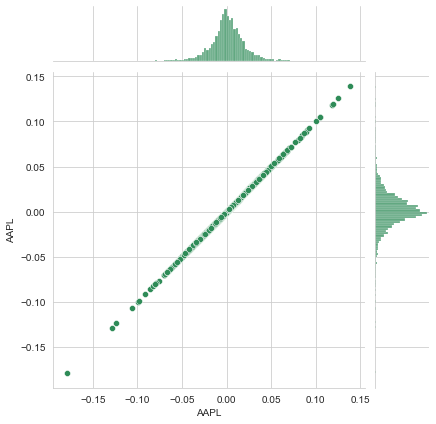

In [61]:
sns.jointplot(data=target_returns, x=tickers[0], y=tickers[0], kind='scatter', color='seagreen')

Select from the following tickers: ['AAPL', 'AMGN', 'HON']
Ticker X:AAPL
Ticker Y:AMGN


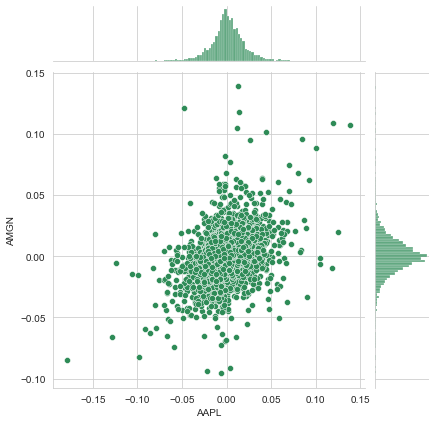

In [62]:
#Compare the daily percentage return of two stocks from the target data
x = input(f"Select from the following tickers: {tickers}\nTicker X:")

while x not in tickers:
    x = input("Ticker X:")
    
y = input("Ticker Y:")

while y not in tickers:
    y = input("Ticker Y:")
    
sns.jointplot(data=target_returns, x=x, y=y, kind='scatter', color='seagreen')

Now we have a better visualization of when stocks have a perfect positive correlation compared to a more realistic scenario where they have a less linear relationship bewteen the daily return values. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our target stock ticker list. We can use sns.pairplot() to automatically create this plot

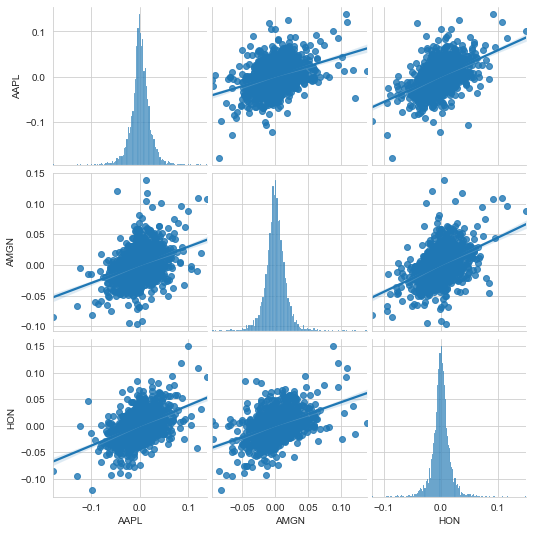

In [65]:
sns.pairplot(target_returns, kind='reg')

Above we can see all the relationships on daily returns between all the stocks in our target dataset. By using this data you can find correlations between different stocks. Next we will make use of sns.PairGrid() to provide further visualizations of this data.

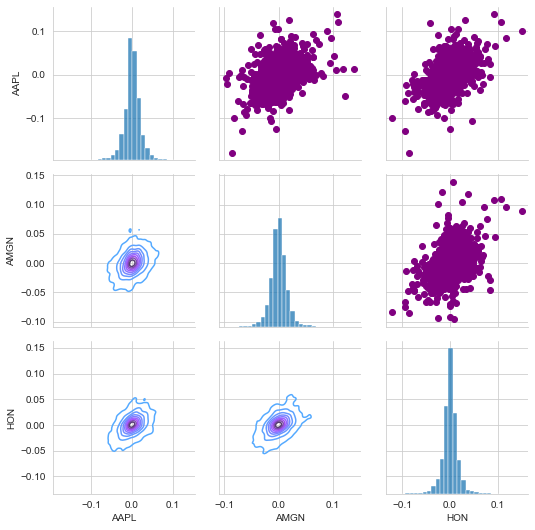

In [66]:
# Using dropna() for Seaborn
return_fig = sns.PairGrid(target_returns.dropna())

# Using map_upper we can specify what the upper triangle portion of the matrix will look like in our figure.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle of the matrix in the figure, including the plot type (kdeplot) 
# or the color map (cmap)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# The diagonal will be a series of histogram plots of the daily return
return_fig.map_diag(sns.histplot, bins=30)

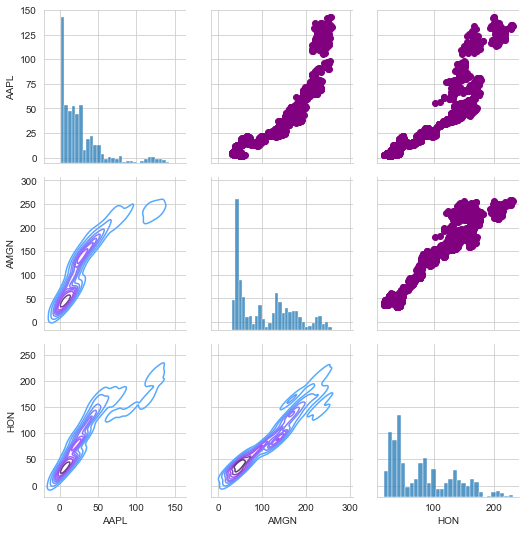

In [67]:
# Repeat for the closing prices
return_fig = sns.PairGrid(closing_df.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(sns.histplot, bins=30)

We can also do a correlation plot to get the actual numerical values for the correlation between the stocks' daily return values as well as the closing values from our dataframe of closing values.

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

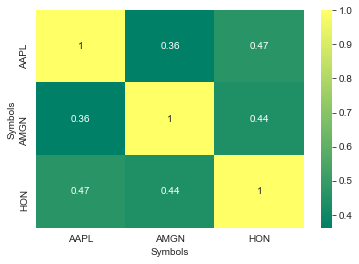

In [68]:
sns.heatmap(target_returns.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

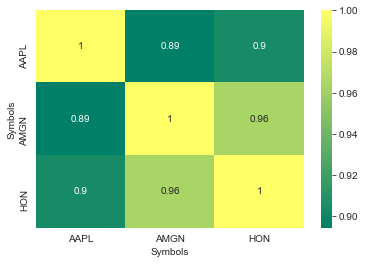

In [69]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

Through the visualization of all this data as well as the numerical outputs, one can determine relationships between stocks and potentially use this information during training of a machine learning algorithm or even as metrics for the users to consider.

# 5. Visualize risk against expected return for investing in a particular stock

There are many ways we can quantify risk, however one of the easiest ways utilizes the information we've already gathered on daily percentage returns. It takes this data and compares it to the expected return with the standard deviation of the daily returns.

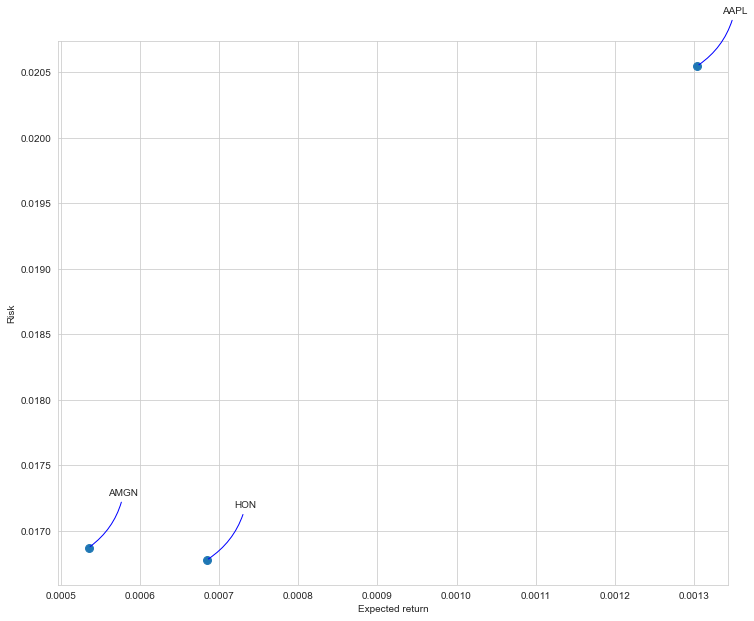

In [70]:
# Let's start by defining a new DataFrame as a clenaed version of the original traget_data Dataframe.
rets = target_returns.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.2'))

# 6. Predicting the closing stock price for a selected stock

We again begin by importing all of the tools and libraries we will need

In [113]:
import time
import copy
import chainer
import chainer.functions as F
import chainer.links as L
from plotly import subplots
from plotly.graph_objs import *
from plotly.offline import init_notebook_mode, iplot, iplot_mpl
init_notebook_mode()

import warnings
warnings.filterwarnings('ignore')

Now we pick the 3 stocks we would like to predict the price of.

In [114]:
data = {}
tickers = ['']
valid_input = False

while not valid_input:
    valid_input = True
    if len(tickers) != 3:
        tickers = ['']
    for ticker in tickers:
        if ticker not in stock_index:
            user_input = input("Enter a list of 3 tickers separated by whitespace:")
            tickers = user_input.split(' ')
            valid_input = False
            break

for ticker in tickers:
    temp = pd.read_csv(f'./stock data/{ticker}.csv')
    temp['Date'] = pd.to_datetime(temp['Date'])
    temp = temp.set_index('Date')
    temp = temp.drop(columns=['company_name'])
    data[ticker] = temp.loc[:]

for ticker in data:
    temp_max = data[ticker].index.max()
    temp_min = data[ticker].index.min()
    if temp_max < max_index:
        max_index = temp_max
    if temp_min > min_index:
        min_index = temp_min

print(f"Date Range: {min_index} - {max_index}")
print("Note: Some dates may be unavailable")

valid_input = False
while not valid_input:
    valid_input = True
    start = input(f"Enter a valid start date (YYYY-MM-DD):")
    for ticker in data:
        if start not in data[ticker].index:
            valid_input = False
            
for ticker in data:
    data[ticker] = data[ticker][start:]
       
valid_input = False
while not valid_input:
    valid_input = True
    user_input = input(f"Enter two Moving Averages seperated by whitespace:")
    ma_days = user_input.split(' ')
    if len(ma_days) != 2:
        valid_input=False
    if int(ma_days[0]) not in range(2,366):
        valid_input=False
    if int(ma_days[1]) not in range(2,366) or ma_days[0] == ma_days[1]:
        valid_input=False

for ma in ma_days:
    for ticker in data:
        column_name = f"MA for {ma} days"
        column = data[ticker]['Adj Close'].rolling(int(ma)).mean()
        data[ticker][column_name] = column.bfill() #Fill in the NaN values left blank by the calculations
        
data[tickers[0]]

Enter a list of 3 tickers separated by whitespace:AAPL AMGN HON
Date Range: 2006-04-28 00:00:00 - 2021-04-28 00:00:00
Note: Some dates may be unavailable
Enter a valid start date (YYYY-MM-DD):2006-05-01
Enter two Moving Averages seperated by whitespace:20 30


High         Low        Open       Close       Volume  \
Date                                                                      
2006-05-01    2.555000    2.470000    2.527500    2.485714  750380400.0   
2006-05-02    2.570714    2.503929    2.505357    2.557857  771663200.0   
2006-05-03    2.569643    2.506429    2.565357    2.540714  686991200.0   
2006-05-04    2.603214    2.516429    2.543571    2.540357  860420400.0   
2006-05-05    2.580357    2.541071    2.566429    2.567500  563911600.0   
...                ...         ...         ...         ...          ...   
2021-04-22  134.149994  131.410004  133.039993  131.940002   84566500.0   
2021-04-23  135.119995  132.160004  132.160004  134.320007   78657500.0   
2021-04-26  135.059998  133.559998  134.830002  134.720001   66905100.0   
2021-04-27  135.410004  134.110001  135.009995  134.389999   66015800.0   
2021-04-28  135.020004  133.080002  134.309998  133.580002  106589600.0   

             Adj Close  MA for 20 days  MA for 30 days  
Date                                                    
2006-05-01    2.141103        2.073763        1.997871  
2006-05-02    2.203244        2.073763        1.997871  
2006-05-03    2.188478        2.073763        1.997871  
2006-05-04    2.188171        2.073763        1.997871  
2006-05-05    2.211551        2.073763        1.997871  
...                ...             ...             ...  
2021-04-22  131.940002      128.568000      126.507000  
2021-04-23  134.320007      129.254501      126.919000  
2021-04-26  134.720001      129.930001      127.375333  
2021-04-27  134.389999      130.580001      127.722000  
2021-04-28  133.580002      131.264001      127.989000  

[3775 rows x 8 columns]

We'll attempt to split the data into training and validation sets where the test set will consist of the last year of data

In [115]:
date_split_1 = datetime.now().date() - timedelta(days= 365)
date_split_2 = date_split_1
date_split_3 = date_split_2

while str(date_split) not in data[tickers[0]].index:
    date_split_1 = date_split - timedelta(days=1)
    
while str(date_split) not in data[tickers[1]].index:
    date_split_2 = date_split - timedelta(days=1)
    
while str(date_split) not in data[tickers[2]].index:
    date_split_3 = date_split - timedelta(days=1)

date_split_1 = str(date_split_1)
date_split_2 = str(date_split_2)
date_split_3 = str(date_split_3)

train_1 = data[tickers[0]].loc[:date_split_1]
train_2 = data[tickers[1]].loc[:date_split_2]
train_3 = data[tickers[2]].loc[:date_split_3]

test_1 = data[tickers[0]].loc[date_split_1:]
test_2 = data[tickers[1]].loc[date_split_2:]
test_3 = data[tickers[2]].loc[date_split_3:]

len(train_1), len(test_1)

(3524, 252)

We will then implement an interactive candlestick graph using plotly to visualize price movements of the stocks.

In [125]:
def plot_train_test(train, test, date_split, ticker):
    
    d = [
        Candlestick(x=train.index, open=train['Open'], high=train['High'], low=train['Low'], close=train['Close'], name='train'),
        Candlestick(x=test.index, open=test['Open'], high=test['High'], low=test['Low'], close=test['Close'], name='test')
    ]
    layout = {
        'title': ticker,
        'title_x': 0.5,
        'shapes': [
             {'x0': date_split, 'x1': date_split, 'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper', 'line': {'color': 'rgb(0,0,0)', 'width': 1}}
         ],
        'annotations': [
            {'x': date_split, 'y': 1.0, 'xref': 'x', 'yref': 'paper', 'showarrow': False, 'xanchor': 'left', 'text': ' test data'},
            {'x': date_split, 'y': 1.0, 'xref': 'x', 'yref': 'paper', 'showarrow': False, 'xanchor': 'right', 'text': 'train data '}
        ]
    }
    figure = Figure(data=d, layout=layout)
    iplot(figure)

In [126]:
plot_train_test(train_1, test_1, date_split_1, tickers[0])

In [127]:
plot_train_test(train_2, test_2, date_split_2, tickers[1])

In [128]:
plot_train_test(train_3, test_3, date_split_3, tickers[2])

In [8]:
class Environment:
    
    def __init__(self, data, history_t=90):
        self.data = data
        self.history_t = history_t
        self.reset()
        
    def reset(self):
        self.t = 0
        self.done = False
        self.profits = 0
        self.positions = []
        self.position_value = 0
        self.history = [0 for _ in range(self.history_t)]
        return [self.position_value] + self.history # obs
    
    def step(self, act):
        reward = 0
        
        # act = 0: stay, 1: buy, 2: sell
        if act == 1: #buy the stock
            self.positions.append(self.data.iloc[self.t, :]['Close'])
        elif act == 2: # sell the stock
            if len(self.positions) == 0:
                reward = -1
            else:
                profits = 0
                for p in self.positions:
                    profits += (self.data.iloc[self.t, :]['Close'] - p)
                reward += profits
                self.profits += profits
                self.positions = []
        
        # set next time
        self.t += 1
        self.position_value = 0
        for p in self.positions:
            self.position_value += (self.data.iloc[self.t, :]['Close'] - p)
        self.history.pop(0)
        self.history.append(self.data.iloc[self.t, :]['Close'] - self.data.iloc[(self.t-1), :]['Close'])
        
        # clipping reward
        if reward > 0:
            reward = 1
        elif reward < 0:
            reward = -1
        
        return [self.position_value] + self.history, reward, self.done # obs, reward, done

In [9]:
env = Environment(train)
print(env.reset())
for _ in range(3):
    pact = np.random.randint(3)
    print(env.step(pact))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.9199981689453693], 0, False)
([6.460006713867216, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.9199981689453693, 6.460006713867216], 0, False)
([11.720016479492216, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [10]:
# DQN

def train_dqn(env):

    class Q_Network(chainer.Chain):

        def __init__(self, input_size, hidden_size, output_size):
            super(Q_Network, self).__init__(
                fc1 = L.Linear(input_size, hidden_size),
                fc2 = L.Linear(hidden_size, hidden_size),
                fc3 = L.Linear(hidden_size, output_size)
            )

        def __call__(self, x):
            h = F.relu(self.fc1(x))
            h = F.relu(self.fc2(h))
            y = self.fc3(h)
            return y

        def reset(self):
            self.zerograds()

    Q = Q_Network(input_size=env.history_t+1, hidden_size=100, output_size=3)
    Q_ast = copy.deepcopy(Q)
    optimizer = chainer.optimizers.Adam()
    optimizer.setup(Q)

    epoch_num = 50
    step_max = len(env.data)-1
    memory_size = 200
    batch_size = 20
    epsilon = 1.0
    epsilon_decrease = 1e-3
    epsilon_min = 0.1
    start_reduce_epsilon = 200
    train_freq = 10
    update_q_freq = 20
    gamma = 0.97
    show_log_freq = 5

    memory = []
    total_step = 0
    total_rewards = []
    total_losses = []

    start = time.time()
    for epoch in range(epoch_num):

        pobs = env.reset()
        step = 0
        done = False
        total_reward = 0
        total_loss = 0

        while not done and step < step_max:

            # select act
            pact = np.random.randint(3)
            if np.random.rand() > epsilon:
                pact = Q(np.array(pobs, dtype=np.float32).reshape(1, -1))
                pact = np.argmax(pact.data)

            # act
            obs, reward, done = env.step(pact)

            # add memory
            memory.append((pobs, pact, reward, obs, done))
            if len(memory) > memory_size:
                memory.pop(0)

            # train or update q
            if len(memory) == memory_size:
                if total_step % train_freq == 0:
                    shuffled_memory = np.random.permutation(memory)
                    memory_idx = range(len(shuffled_memory))
                    for i in memory_idx[::batch_size]:
                        batch = np.array(shuffled_memory[i:i+batch_size])
                        b_pobs = np.array(batch[:, 0].tolist(), dtype=np.float32).reshape(batch_size, -1)
                        b_pact = np.array(batch[:, 1].tolist(), dtype=np.int32)
                        b_reward = np.array(batch[:, 2].tolist(), dtype=np.int32)
                        b_obs = np.array(batch[:, 3].tolist(), dtype=np.float32).reshape(batch_size, -1)
                        b_done = np.array(batch[:, 4].tolist(), dtype=np.bool)

                        q = Q(b_pobs)
                        maxq = np.max(Q_ast(b_obs).data, axis=1)
                        target = copy.deepcopy(q.data)
                        for j in range(batch_size):
                            target[j, b_pact[j]] = b_reward[j]+gamma*maxq[j]*(not b_done[j])
                        Q.reset()
                        loss = F.mean_squared_error(q, target)
                        total_loss += loss.data
                        loss.backward()
                        optimizer.update()

                if total_step % update_q_freq == 0:
                    Q_ast = copy.deepcopy(Q)

            # epsilon
            if epsilon > epsilon_min and total_step > start_reduce_epsilon:
                epsilon -= epsilon_decrease

            # next step
            total_reward += reward
            pobs = obs
            step += 1
            total_step += 1

        total_rewards.append(total_reward)
        total_losses.append(total_loss)

        if (epoch+1) % show_log_freq == 0:
            log_reward = sum(total_rewards[((epoch+1)-show_log_freq):])/show_log_freq
            log_loss = sum(total_losses[((epoch+1)-show_log_freq):])/show_log_freq
            elapsed_time = time.time()-start
            print('\t'.join(map(str, [epoch+1, epsilon, total_step, log_reward, log_loss, elapsed_time])))
            start = time.time()
            
    return Q, total_losses, total_rewards

In [11]:
Q, total_losses, total_rewards = train_dqn(Environment(train))

5	0.0999999999999992	1505	-21.0	1046.2229766733944	7.205698728561401
10	0.0999999999999992	3010	-22.6	571.5542198292911	8.186386346817017
15	0.0999999999999992	4515	-8.0	55.98473009970039	7.927469491958618
20	0.0999999999999992	6020	8.2	25.527809543255717	7.639561176300049
25	0.0999999999999992	7525	11.4	40.07948252884671	7.716536283493042
30	0.0999999999999992	9030	15.6	16.762142409943046	8.184386730194092
35	0.0999999999999992	10535	10.0	13.37205419735983	8.110410928726196
40	0.0999999999999992	12040	0.2	17.283239367743953	8.742209196090698
45	0.0999999999999992	13545	5.0	32.119607453420755	8.667232275009155
50	0.0999999999999992	15050	5.6	17.849218125548212	8.533276319503784


In [12]:
def plot_loss_reward(total_losses, total_rewards):

    figure = subplots.make_subplots(rows=1, cols=2, subplot_titles=('loss', 'reward'), print_grid=False)
    figure.append_trace(Scatter(y=total_losses, mode='lines', line=dict(color='skyblue')), 1, 1)
    figure.append_trace(Scatter(y=total_rewards, mode='lines', line=dict(color='orange')), 1, 2)
    figure['layout']['xaxis1'].update(title='epoch')
    figure['layout']['xaxis2'].update(title='epoch')
    figure['layout'].update(height=400, width=900, showlegend=False)
    iplot(figure)

In [13]:
plot_loss_reward(total_losses, total_rewards)

In [14]:
def plot_train_test_by_q(train_env, test_env, Q, algorithm_name):
    
    # train
    pobs = train_env.reset()
    train_acts = []
    train_rewards = []

    for _ in range(len(train_env.data)-1):
        
        pact = Q(np.array(pobs, dtype=np.float32).reshape(1, -1))
        pact = np.argmax(pact.data)
        train_acts.append(pact)
            
        obs, reward, done = train_env.step(pact)
        train_rewards.append(reward)

        pobs = obs
        
    train_profits = train_env.profits
    
    # test
    pobs = test_env.reset()
    test_acts = []
    test_rewards = []

    for _ in range(len(test_env.data)-1):
    
        pact = Q(np.array(pobs, dtype=np.float32).reshape(1, -1))
        pact = np.argmax(pact.data)
        test_acts.append(pact)
            
        obs, reward, done = test_env.step(pact)
        test_rewards.append(reward)

        pobs = obs
        
    test_profits = test_env.profits
    
    # plot
    train_copy = train_env.data.copy()
    test_copy = test_env.data.copy()
    train_copy['act'] = train_acts + [np.nan]
    train_copy['reward'] = train_rewards + [np.nan]
    test_copy['act'] = test_acts + [np.nan]
    test_copy['reward'] = test_rewards + [np.nan]
    train0 = train_copy[train_copy['act'] == 0]
    train1 = train_copy[train_copy['act'] == 1]
    train2 = train_copy[train_copy['act'] == 2]
    test0 = test_copy[test_copy['act'] == 0]
    test1 = test_copy[test_copy['act'] == 1]
    test2 = test_copy[test_copy['act'] == 2]
    act_color0, act_color1, act_color2 = 'gray', 'green', 'red'

    data = [
        Candlestick(x=train0.index, open=train0['Open'], high=train0['High'], low=train0['Low'], close=train0['Close'], increasing=dict(line=dict(color=act_color0)), decreasing=dict(line=dict(color=act_color0))),
        Candlestick(x=train1.index, open=train1['Open'], high=train1['High'], low=train1['Low'], close=train1['Close'], increasing=dict(line=dict(color=act_color1)), decreasing=dict(line=dict(color=act_color1))),
        Candlestick(x=train2.index, open=train2['Open'], high=train2['High'], low=train2['Low'], close=train2['Close'], increasing=dict(line=dict(color=act_color2)), decreasing=dict(line=dict(color=act_color2))),
        Candlestick(x=test0.index, open=test0['Open'], high=test0['High'], low=test0['Low'], close=test0['Close'], increasing=dict(line=dict(color=act_color0)), decreasing=dict(line=dict(color=act_color0))),
        Candlestick(x=test1.index, open=test1['Open'], high=test1['High'], low=test1['Low'], close=test1['Close'], increasing=dict(line=dict(color=act_color1)), decreasing=dict(line=dict(color=act_color1))),
        Candlestick(x=test2.index, open=test2['Open'], high=test2['High'], low=test2['Low'], close=test2['Close'], increasing=dict(line=dict(color=act_color2)), decreasing=dict(line=dict(color=act_color2)))
    ]
    title = '{}: train s-reward {}, profits {}, test s-reward {}, profits {}'.format(
        algorithm_name,
        int(sum(train_rewards)),
        int(train_profits),
        int(sum(test_rewards)),
        int(test_profits)
    )
    layout = {
        'title': title,
        'showlegend': False,
         'shapes': [
             {'x0': date_split, 'x1': date_split, 'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper', 'line': {'color': 'rgb(0,0,0)', 'width': 1}}
         ],
        'annotations': [
            {'x': date_split, 'y': 1.0, 'xref': 'x', 'yref': 'paper', 'showarrow': False, 'xanchor': 'left', 'text': ' test data'},
            {'x': date_split, 'y': 1.0, 'xref': 'x', 'yref': 'paper', 'showarrow': False, 'xanchor': 'right', 'text': 'train data '}
        ]
    }
    figure = Figure(data=data, layout=layout)
    iplot(figure)

In [15]:
plot_train_test_by_q(Environment(train), Environment(test), Q, 'DQN')